In [1]:
import sys
sys.path.append("../")
from request.dao import Dao
from PyQt5.QtWidgets import QApplication
from pandas import DataFrame
from entity.stock import Stock
from request.enum.stockEnum import CandleUnit
import matplotlib.pyplot as plt

In [2]:
app = QApplication([])

In [3]:
Dao().login()

In [4]:
e_mart = Dao().request_stock_instance("104040")
print(e_mart.get_code_name())


104040


In [5]:
a= Dao().get_today_date()
a


TypeError: get_today_date() takes 0 positional arguments but 1 was given

In [ ]:
data = Dao().request_candle_data(e_mart,CandleUnit.DAY,2)
data

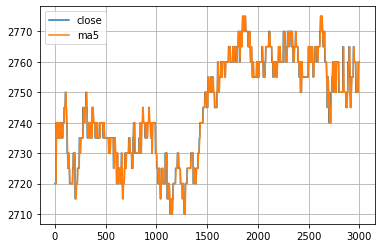

In [6]:
plt.plot(data.index, data.close, label='close')
plt.plot(data.index, data.ma5, label='ma5')
plt.legend(loc="best")
plt.grid()
plt.show()